In [21]:
import networkx as nx
import numpy as np
from itertools import chain, combinations
from tqdm import tqdm

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)  # allows duplicate elements
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))

number_of_nodes = 8

nodes = np.arange(number_of_nodes)
possible_edges = list(combinations(nodes, 2))

num_graphs = 2 ** len(possible_edges)

print(f'Total number of graphs: {num_graphs:_}')

Total number of graphs: 268_435_456


In [22]:
fixed_graph = nx.erdos_renyi_graph(number_of_nodes, 0.7)
fixed_graph_edges = set(fixed_graph.edges())

print(f'# of Nodes: {fixed_graph.number_of_nodes():_}\n# of Edges: {fixed_graph.number_of_edges():_}')

n_subgraphs = 2 ** len(fixed_graph_edges)

print(f'\nNumber of subgraphs: {n_subgraphs:_} = {(n_subgraphs) / num_graphs:.3%}')

# of Nodes: 8
# of Edges: 20

Number of subgraphs: 1_048_576 = 0.391%


In [23]:
def ks_distance(graph_1, graph_2):
    subgraph_degrees = np.sort(list(dict(graph_1.degree()).values()))
    full_degrees = np.sort(list(dict(graph_2.degree()).values()))

    all_degrees = np.concatenate([subgraph_degrees, full_degrees])

    cdf1 = np.searchsorted(subgraph_degrees, all_degrees, side='right') / len(subgraph_degrees)
    cdf2 = np.searchsorted(full_degrees, all_degrees, side='right') / len(full_degrees)

    dist = np.max(np.abs(cdf1 - cdf2))
    return dist

In [24]:
n_bins = 20

bins = np.linspace(0, 1, n_bins+1)
histogram = np.zeros((n_bins,))

for edge_set in tqdm(powerset(fixed_graph_edges), total=n_subgraphs-1):
    graph = nx.Graph(edge_set)

    dist = ks_distance(fixed_graph, graph)
    hist, _ = np.histogram([dist], bins=bins)
    histogram += hist

100%|██████████| 1048575/1048575 [01:38<00:00, 10621.86it/s]


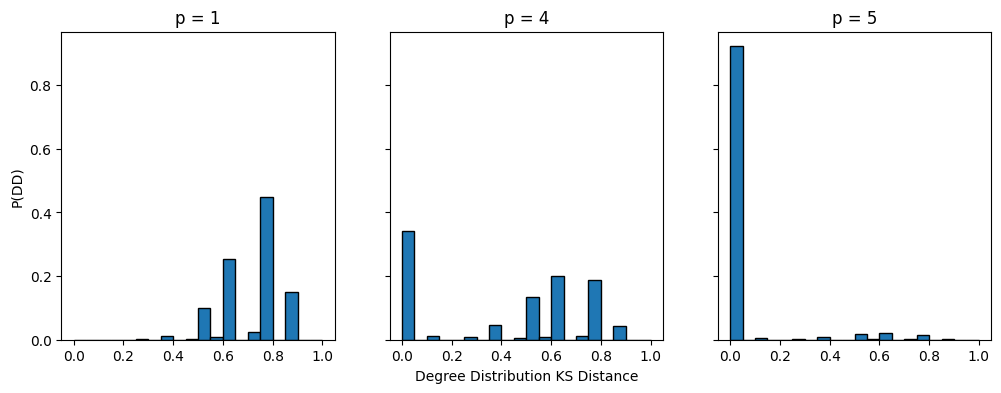

In [47]:
import matplotlib.pyplot as plt

bin_centers = np.array([(bins[i] + bins[i+1]) / 2 for i in range(n_bins)])

fig, axs = plt.subplots(1, 3, figsize=(12,4), sharey=True)

p = 1

axs[0].bar(bin_centers, histogram * (1 / (bin_centers ** p)) / np.sum(histogram * (1 / (bin_centers ** p))), width=1/n_bins, edgecolor='k')
axs[1].bar(bin_centers, histogram * (1 / (bin_centers ** 4)) / np.sum(histogram * (1 / (bin_centers ** 4))), width=1/n_bins, edgecolor='k')
axs[2].bar(bin_centers, histogram * (1 / (bin_centers ** 5)) / np.sum(histogram * (1 / (bin_centers ** 5))), width=1/n_bins, edgecolor='k')

axs[0].set_title(f'p = {p}')
axs[1].set_title(f'p = 4')
axs[2].set_title(f'p = 5')


axs[0].set_ylabel('P(DD)')
axs[1].set_xlabel('Degree Distribution KS Distance')

print()